# Principal Component Analysis

Reduce the dimension of the dataset with minimal loss.
We project our feature space into a lower dimension that represents our data well.

###### How is PCA different from LDA or MDA?

in PCA we find only the direction that maximizes the variance in the dataset, in MDA along with maximizing the variance we find the direction that maximises the seperation (discrimination) between classes

Briefly, PCA is unsupervised so it treats the whole dataset as a single class and projects it onto a smaller subspace which maximises the variance such that all the data spread is captures, MDA is supervised so, additionally it is maximizing the spread between classes as it is aware of the class labels.

###### Steps

1. Compute the d dimensional covariance matrix of the feature space 
2. Compute the Eigen vectors 
3. Sort the eigen vectors and choose K eigen vectors that are the largest, and form d x k transformation matrix
4. use the transformation matrix to transform the dataset to lower dimension

In [1]:
import numpy as np

np.random.seed(1)
#setting seed will generate the same set of random numbers in all 
#the enviornments 

#creating two classes of data 

mean_vector1 = np.array([0,0,0])
covariance_matrix1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vector1,covariance_matrix1,20).T


In [2]:
class1

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733],
       [-0.52817175, -2.3015387 ,  0.3190391 , -2.06014071,  1.13376944,
        -0.87785842, -1.10061918,  0.50249434, -0.12289023,  0.53035547,
        -0.6871727 , -0.0126646 ,  1.65980218, -0.88762896,  0.05080775,
         2.10025514,  0.30017032, -0.34934272,  0.83898341,  0.88514116]])

In [3]:
assert class1.shape == (3,20), "The matrix has not the dimensions 3x20"


In [4]:
mean_vector2 = np.array([1,1,1])
covariance_matrix2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vector2,covariance_matrix2,20).T

In [5]:
assert class2.shape == (3,20), "The matrix has not the dimensions 3x20"

Here, the dataset have 20 features and 3 rows, 3 x 20

and belongs to two classes

###### visualize the data 

In [6]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

Populating the interactive namespace from numpy and matplotlib


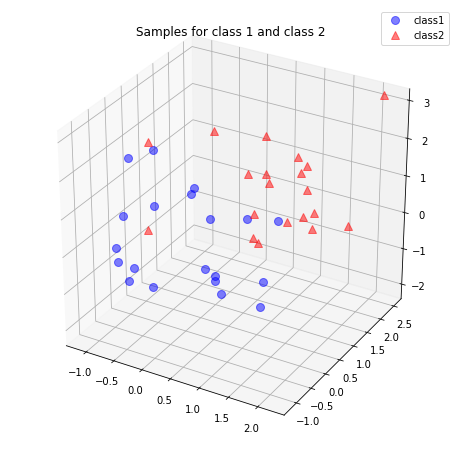

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1[0,:], class1[1,:], class1[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2[0,:], class2[1,:], class2[2,:], '^', markersize=8, color='red', alpha=0.5, label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [8]:
#now combine both the classes 

full_data = np.concatenate((class1,class2), axis=1)

assert full_data.shape == (3,40), "The matrix is not the dimension 3 x 40"

In [9]:
#find the mean of all the dimensions

mean_x = np.mean(full_data[0,:])
mean_y = np.mean(full_data[1,:])
mean_z = np.mean(full_data[2,:])

full_mean = np.array([[mean_x],[mean_y],[mean_z]])
print(full_mean)

[[0.41667492]
 [0.69848315]
 [0.49242335]]


Here each row is thought as a dimension and the idea is to reduce this and the columns are like the samples

In [10]:
#compute the scatter matrix

scatter_matrix = np.zeros((3,3))
for i in range(full_data.shape[1]):
    scatter_matrix += (full_data[:,i].reshape(3,1) - full_mean).dot((full_data[:,i].reshape(3,1) - full_mean).T)
print('Scatter Matrix:\n', scatter_matrix)


Scatter Matrix:
 [[38.4878051  10.50787213 11.13746016]
 [10.50787213 36.23651274 11.96598642]
 [11.13746016 11.96598642 49.73596619]]


In [11]:
#computer the covariance matrix
#the covaraince is identical to scatter matrix except that the values are scaled
#by the scaling factor 1/(N-1), 1/39 in this case

covariance_matrix = np.cov([full_data[0,:],full_data[1,:],full_data[2,:]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[0.9868668  0.26943262 0.2855759 ]
 [0.26943262 0.92914135 0.30682016]
 [0.2855759  0.30682016 1.27528118]]


In [12]:
scatter_matrix/40 #just to prove

array([[0.96219513, 0.2626968 , 0.2784365 ],
       [0.2626968 , 0.90591282, 0.29914966],
       [0.2784365 , 0.29914966, 1.24339915]])

In [13]:
#compute the eigenvectors and the eigenvalues 

# eigenvectors and eigenvalues for the from the scatter matrix
eig_value_sc, eig_vector_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_value_cov, eig_vector_cov = np.linalg.eig(covariance_matrix)


Populating the interactive namespace from numpy and matplotlib


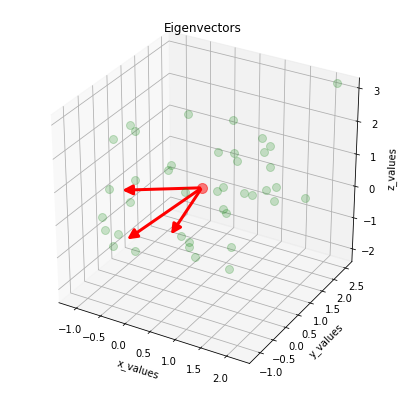

In [14]:
#visualize the eigen vectors 


%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(full_data[0,:], full_data[1,:], full_data[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vector_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

**note** in our new smaller feature space the eigen vectors will form the axes

In [16]:
#we need the drop the eigen vectors that have low value to lower the dimension
#make a pair list of the eigen value and the eigen vector 

eigen_pairs = [(np.abs(eig_value_sc[i]),eig_vector_sc[i]) for i in range(len(eig_value_sc))]

#sort the pairs based on the lambda values 
eigen_pairs.sort(key=lambda x:x[0],reverse=True)

#display the sorted eigen value pairs
for each in eigen_pairs:
    print(each)

(65.16936779078195, array([-0.49210223, -0.64670286,  0.58276136]))
(32.69471296321796, array([-0.47927902, -0.35756937, -0.8015209 ]))
(26.596203282097097, array([-0.72672348,  0.67373552,  0.13399043]))


In [17]:
#use the eigen pairs to create a d x k matrix 

matrix_transform = np.hstack((eigen_pairs[0][1].reshape(3,1), eigen_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_transform)

Matrix W:
 [[-0.49210223 -0.47927902]
 [-0.64670286 -0.35756937]
 [ 0.58276136 -0.8015209 ]]


In [18]:
#note the features are the same but they are plotted this is in a lower dimension

transformed_data = matrix_transform.T.dot(full_data)
assert transformed_data.shape == (2,40), "The matrix is not 2x40 dimensional."

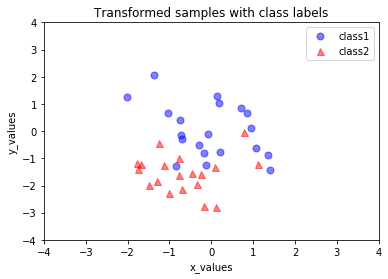

In [20]:
plt.plot(transformed_data[0,0:20], transformed_data[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed_data[0,20:40], transformed_data[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

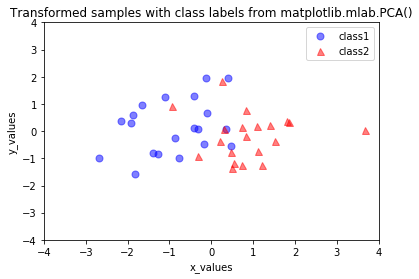

In [22]:
#to confirm we have done it correct, let us compare with the PCA implementation from sklearn

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(full_data.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

###### open questions

did not replicate covariance = eigenvector * eigenvalue

###### Above Implementation take from below

http://sebastianraschka.com/Articles/2014_pca_step_by_step.html

###### Detour

In python assert statement is used to check for a condition

in the above case class1.shape == (3,20) checks whether the shape of the data is (3,20) if not there will be assert error 